Submission by

1. Siddhartha Singh
2. Aakash Bhattacharya

Please upload

1. heart_disease_uci.csv from the assignment folder
2. insurance.csv from the assignment folder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import sys 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset = pd.read_csv('heart_disease_uci.csv')
dataset.shape

(920, 16)

In [ ]:
dataset.trestbps=dataset.trestbps.fillna(dataset['trestbps'].median())
dataset.thal=dataset.thal.fillna('normal')
dataset.fbs=dataset.fbs.fillna('False')
dataset.restecg=dataset.restecg.fillna('normal')
dataset.thalch=dataset.thalch.fillna(dataset['thalch'].mean())
dataset.chol=dataset.chol.fillna(dataset['chol'].median())
dataset.exang=dataset.exang.fillna('False')
dataset.oldpeak=dataset.oldpeak.fillna(dataset['oldpeak'].mean())
dataset.slope=dataset.slope.fillna('flat')
dataset.thal=dataset.thal.fillna('normal')
dataset.fbs=dataset.fbs.fillna('False')
dataset.restecg=dataset.restecg.fillna('normal')
dataset.thalch=dataset.thalch.fillna(dataset['thalch'].mean())


In [ ]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
dataset.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [ ]:
dataset.drop(['ca'],axis=1,inplace=True)

In [ ]:
dataset.loc[dataset["num"] == 2,"num"] = 1
dataset.loc[dataset["num"] == 3,"num"] = 1
dataset.loc[dataset["num"] == 4,"num"] = 1

In [ ]:
inputs1=dataset.drop("num",axis='columns')
inputs=inputs1.drop("id",axis='columns')
target=dataset['num']

In [ ]:
def newLabelEncoder():
  return LabelEncoder()

In [ ]:

sex_label_encoder = newLabelEncoder()
dataset_label_encoder = newLabelEncoder()
cp_label_encoder = newLabelEncoder()
fbs_label_encoder = newLabelEncoder()
restecg_label_encoder = newLabelEncoder()
exang_label_encoder = newLabelEncoder()
slope_label_encoder = newLabelEncoder()
thal_label_encoder = newLabelEncoder()

inputs['sex_shadow'] = sex_label_encoder.fit_transform(inputs['sex'])
inputs['dataset_shadow'] = dataset_label_encoder.fit_transform(inputs['dataset'])
inputs['cp_shadow'] = cp_label_encoder.fit_transform(inputs['cp'])
inputs['restecg_shadow'] = restecg_label_encoder.fit_transform(inputs['restecg'])
inputs['slope_shadow'] = slope_label_encoder.fit_transform(inputs['slope'])
inputs['thal_shadow'] = thal_label_encoder.fit_transform(inputs['thal'])
inputs.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,sex_shadow,dataset_shadow,cp_shadow,restecg_shadow,slope_shadow,thal_shadow
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,1,0,3,0,0,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,1,0,0,0,1,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1,0,0,0,1,2
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,1,0,2,1,0,1
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0,0,1,0,2,1


In [ ]:
inputs_n=inputs.drop(['sex','dataset','cp','restecg','slope','thal','fbs','exang'],axis='columns')
inputs_n.head(20)

,age,trestbps,chol,thalch,oldpeak,sex_shadow,dataset_shadow,cp_shadow,restecg_shadow,slope_shadow,thal_shadow
0,63,145.0,233.0,150.0,2.3,1,0,3,0,0,0
1,67,160.0,286.0,108.0,1.5,1,0,0,0,1,1
2,67,120.0,229.0,129.0,2.6,1,0,0,0,1,2
3,37,130.0,250.0,187.0,3.5,1,0,2,1,0,1
4,41,130.0,204.0,172.0,1.4,0,0,1,0,2,1
5,56,120.0,236.0,178.0,0.8,1,0,1,1,2,1
6,62,140.0,268.0,160.0,3.6,0,0,0,0,0,1
7,57,120.0,354.0,163.0,0.6,0,0,0,1,2,1
8,63,130.0,254.0,147.0,1.4,1,0,0,0,1,2
9,53,140.0,203.0,155.0,3.1,1,0,0,0,0,2


In [ ]:
model=tree.DecisionTreeClassifier()

In [ ]:
X=inputs_n.iloc[:,:]
y=target.iloc[:,]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=0)

In [ ]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7228260869565217

In [ ]:
y_pred=model.predict(X_test)
confusion_matrix ( y_test , y_pred )

print ( classification_report ( y_test , y_pred ) )

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        80
           1       0.78      0.71      0.74       104

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.73      0.72      0.72       184



In [ ]:
# knn
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

0.6684782608695652
0.6358695652173914
0.657608695652174
0.6956521739130435
0.717391304347826
0.6902173913043478
0.6847826086956522
0.6902173913043478
0.6956521739130435
0.6847826086956522
0.717391304347826
0.6956521739130435
0.717391304347826
0.7119565217391305
0.7119565217391305
0.6793478260869565
0.6847826086956522
0.6793478260869565
0.7010869565217391
0.7010869565217391


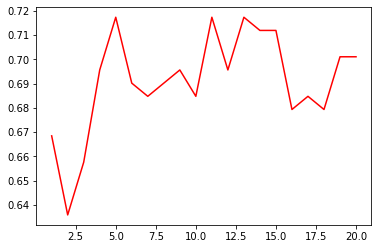

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    print(knn_scores[i-1])

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

0.75
0.8043478260869565
0.7989130434782609
0.8097826086956522
0.8097826086956522


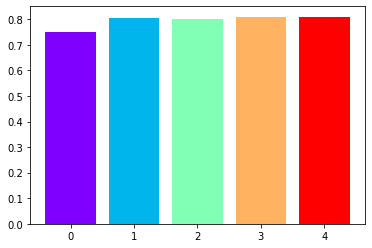

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    print(rf_scores[i])

In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc [:, -1].values

In [ ]:
encoder = LabelEncoder()
X[:, 1] = encoder.fit_transform(X[:, 1]) 
X[:, 4] = encoder.fit_transform(X[:, 4]) 

np.set_printoptions(threshold=sys.maxsize)


In [ ]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

np.set_printoptions(threshold=sys.maxsize)

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,train_y)

LinearRegression()

In [ ]:
y_pred = model.predict(poly_reg.fit_transform(test_X))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1)[:10])

[[11272.56  9724.53]
 [10506.09  8547.69]
 [53219.72 45702.02]
 [14769.66 12950.07]
 [ 9841.19  9644.25]
 [ 7463.28  4500.34]
 [ 2659.41  2198.19]
 [15294.25 11436.74]
 [10877.34  7537.16]
 [ 8157.22  5425.02]]
